    Actual  Predicted
0       80  81.093053
1       76  79.331374
2       68  58.436930
3       94  94.144825
4       56  54.867625
5       58  51.344267
6       88  84.616410
7       79  79.285426
8       47  50.097308
9       46  52.459492
10      57  55.210771
11      96  95.860555
12      92  94.236721
13      42  60.152661
14      84  80.143291
15      64  60.838953
16      70  76.191001
17      86  80.097343
18      65  59.591993
Average yearly family income of $200,000, Teacher Experience of 25 Years and educated at a Private school will produce a predicted average %student exam score of: [98.90903163]
Average yearly family income of $40,000, Teacher Experience of 14 Years and educated at a Public school will produce predicted average %student exam score of: [57.10418424]
Average yearly family income of $70,000, Teacher Experience of 15 Years and educated at a Private school will produce a predicted average %student exam score of: [74.42932253]
Coefficient value of Average famil

C:\Users\Roelo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Roelo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


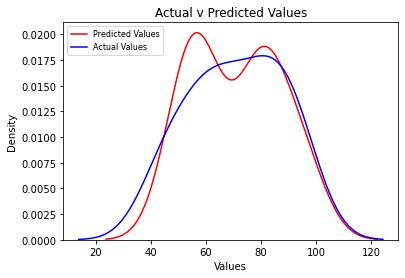

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Student Score.csv")

#Adding another column/Decalare a list to be converted into a column
Teacher_Experience=[20,19,15,24,12,10,22,18,9,10,12,24,26,15,18,15,16,17,14]
df["Teacher_Experience"]=Teacher_Experience

#Rename a column
df.rename(columns={"Teacher_Experience":"Teacher Experience/Years"},inplace=True)

#Convert Catergorical Variables in column in Quantitative Variable/new data frame
dummy=pd.get_dummies(df["Type of School"])
#Merge/concatenate new dataframe with the original/axis=1 (put it on the right side)
df=pd.concat([df,dummy],axis=1)

#Preparing the data/Get the columns for attribute set and label
X=df[["Average family income","Teacher Experience/Years","Private","Public"]]
y=df["Average student exam score"]

#Perform Linear Regression/Fit the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)

#Prediction Actual and Predicted
y_pred=regressor.predict(X)
df=pd.DataFrame({"Actual":y, "Predicted":y_pred})
print(df)

#Perform predictions with different values
Predicted_exam_score=regressor.predict([[200,25,1,0]])
Predicted_exam_score2=regressor.predict([[40,14,0,1]])
Predicted_exam_score3=regressor.predict([[70,15,1,0]])
print("Average yearly family income of $200,000, Teacher Experience of 25 Years and educated at a Private school will produce a predicted average %student exam score of:", Predicted_exam_score)
print("Average yearly family income of $40,000, Teacher Experience of 14 Years and educated at a Public school will produce predicted average %student exam score of:", Predicted_exam_score2)
print("Average yearly family income of $70,000, Teacher Experience of 15 Years and educated at a Private school will produce a predicted average %student exam score of:", Predicted_exam_score3)

#Print the slope and intercept
print("Coefficient value of Average family income/Teacher experience/Private school/Public school against Average Student exam score",regressor.coef_)
print("Intercept:",regressor.intercept_)

#Figure out the Mean_Squared_Error/R2 squared
from sklearn.metrics import mean_squared_error,r2_score
rmse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
    
#Create a Distribution plot/hist=False - want a distribution instead of histogram
sns.distplot(y_pred, hist=False, color="red",label="Predicted Values")
sns.distplot(y,hist=False,color="blue",label="Actual Values")
plt.title("Actual v Predicted Values")
plt.xlabel("Values",fontsize=10)
plt.legend(loc="upper left",fontsize=8)
